In [1]:
# /// script
# requires-python = ">=3.13"
# dependencies = [
#     "numpy",
#     "pandas",
#     "pyarrow",
#     "scikit-learn",
#     "umap-learn",
# ]
# ///

In [2]:
print("sup")

sup


In [3]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
penguins = pd.read_csv("https://raw.githubusercontent.com/allisonhorst/palmerpenguins/c19a904462482430170bfe2c718775ddb7dbb885/inst/extdata/penguins.csv")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [5]:
penguins = penguins.dropna()
penguins.species.value_counts()

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

In [18]:
import umap

reducer = umap.UMAP(n_components=3)
# reducer = umap.UMAP()

penguin_data = penguins[
    [
        "bill_length_mm",
        "bill_depth_mm",
        "flipper_length_mm",
        "body_mass_g",
    ]
].values
scaled_penguin_data = StandardScaler().fit_transform(penguin_data)

embedding = reducer.fit_transform(scaled_penguin_data)
embedding.shape

/Users/davidkouril/projects/dvdkouril/scattered/data/.pixi/envs/default/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


(333, 3)

In [16]:
# type(embedding)
embedding[0] # just looking at the first row

array([13.950113 ,  2.8262327], dtype=float32)

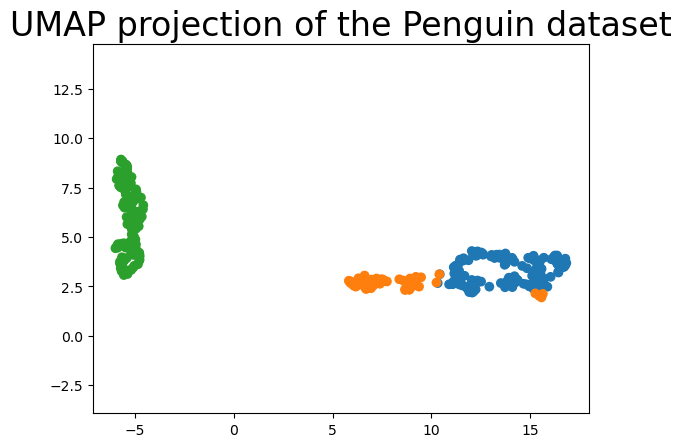

In [17]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in penguins.species.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Penguin dataset', fontsize=24);

In [4]:
# from sklearn.datasets import fetch_openml
# import umap

# # Load MNIST (28x28 images as flattened vectors)
# mnist = fetch_openml('mnist_784', version=1)
# X = mnist.data.astype(np.float32)  # Shape (70000, 784)

# # Reduce to 3D
# reducer = umap.UMAP(n_components=3)
# embeddings_3d = reducer.fit_transform(X)

# print(embeddings_3d)
# # Now you can visualize it or use it for clustering